# $k-nearest-neighbors$ 

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 handle data

In [65]:
def loadDataset(filename, split, trainingSet = [], testSet = [], irisSet = []):
    with open(filename, 'rb') as cvsfile:
        lines = csv.reader(cvsfile)
        dataset = list(lines)
        for data in dataset:
            data[:-1] = map(float, data[:-1])
            irisSet.append(data)
            if random.random() < split:
                trainingSet.append(data)
            else:
                testSet.append(data)
        return trainingSet, testSet, irisSet

trainingSet, testSet, irisSet = loadDataset('iris.data',0.66)

print trainingSet[44], '\n'
print len(trainingSet), len(testSet)

[5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'] 

94 56


In [74]:
setoa = [d[:-1] for d in irisSet if d[-1] == 'Iris-setosa']
versicolor = [d[:-1] for d in irisSet if d[-1] == 'Iris-versicolor']
virginica = [d[:-1] for d in irisSet if d[-1] == 'Iris-virginica']

#### sideplot : 100000 dataset

np.where minitest

In [19]:
a = np.arange(12).reshape(3,4)

print a,'\n'
print np.where(a > 5), '\n'
print a[[1,2,0,0],[1,2,0,3]]

del(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

(array([1, 1, 2, 2, 2, 2]), array([2, 3, 0, 1, 2, 3])) 

[ 5 10  0  3]


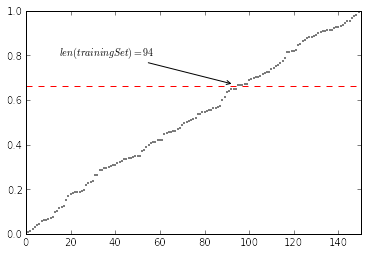

In [131]:
len_data = 150

l = np.random.random(len_data)
l.sort()
plt.plot(l, 'ko', ms=1)

lin =0.66*np.ones(len_data)
plt.plot(lin, 'r--')

i = np.where(l<0.66)[0][-1]
ax = plt.gca()

xlim = ax.set_xlim([0, len_data])
note = '$len(trainingSet) = {0}$'.format(str(i))
arrow = dict(arrowstyle='->')

annot = ax.annotate(note, xy=(i-1, 0.67), xytext=(15, 0.8), arrowprops=arrow)

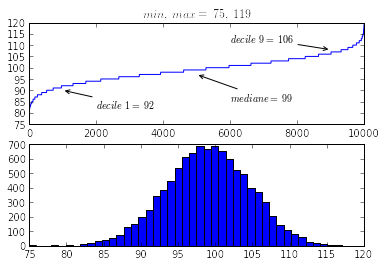

In [157]:
N = 10000
len_data = 150

sample = np.random.random((N, 150))
sample[:] = np.where(sample[:]<0.66,1,0)
l = [np.sum(s) for s in sample]
l.sort()
fig, axes = plt.subplots(2,1)
ax1, ax2 = axes

ax1.plot(l)

N1 = int(N*0.1)
note = "$decile\, 1 =\, {0}$".format(int((l[N1])))
annot = ax1.annotate(note, xy=(N1, l[N1]-2), xytext=(2*N1, l[N1]-10), arrowprops=arrow)

note = "$mediane =\, {0}$".format(int(l[N / 2]))
annot = ax1.annotate(note, xy=(N / 2, l[N / 2]-2), xytext=(0.6*N, l[N / 2 / 2]-10), arrowprops=arrow)

N9 = int(N * 0.9)
note = "$decile\, 9 =\, {0}$".format(int(l[N9]))
annot = ax1.annotate(note, xy=(N9 , l[N9]+2), xytext=(0.6 * N, l[N9] + 5), arrowprops=arrow)

ax1.set_title("$min,\, max =\, {0},\, {1}$".format(int(l[0]), int(l[N-1])))

ax2.hist(l, 45)

plt.show()
plt.clf()
#del(N, len_data, sample, l, N1, N9, ax, annot)

## 2 numpy

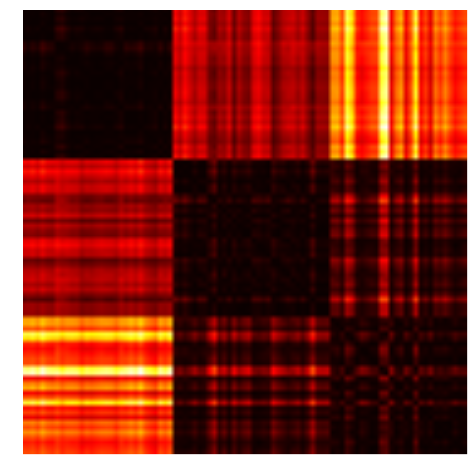

In [4]:
name = [elem[-1] for elem in trainingSet]
value = [elem[:-1] for elem in trainingSet]

len_data = len(name)
len_para = len(value[0])

data = np.array(value)

# broadcasting to get difference between different
# pair of dimension

diff = data.reshape(len_data, 1, len_para) - data

# diff.shape = (len_data,len_data,len_para)

# Aggregate to find pairwise (euclidian-)distances
# (axis=2)

D = (diff**2).sum(2)
# D.shape = (len_data, len_data)

fig =plt.figure(figsize=(8,8))

x = np.arange(len_data)
y = np.arange(len_data)
x, y = np.meshgrid(x, y)
#scat = plt.scatter(x,y,D, alpha=0.5)
plt.imshow(D)
plt.axis('off')
plt.set_cmap('hot')
xlim = plt.xlim(0, len_data)
ylim = plt.ylim(len_data, 0)

Symetric: Can we divide computation by 2 ?

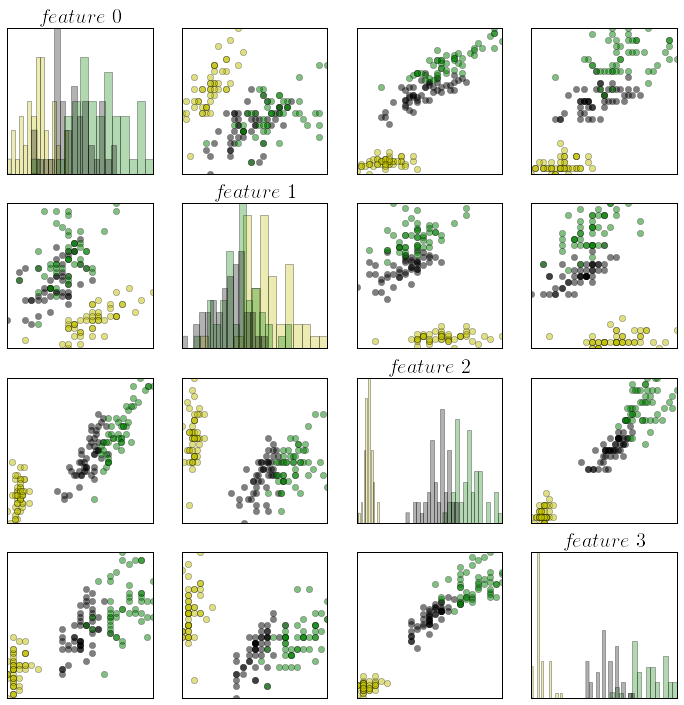

In [88]:


seto = np.array(setoa, dtype=float)
versicolo = np.array(versicolor, dtype=float)
virginic = np.array(virginica, dtype=float)

fig, axes = plt.subplots(4,4, figsize=(12,12))

gen = ((i, j) for i in range(4) for j in range(4))

def plot_ij(ax, i, j):
    ax.plot(seto[:,i], seto[:,j], 'yo', alpha=0.5)
    ax.plot(versicolo[:,i], versicolo[:,j], 'ko', alpha=0.5)
    ax.plot(virginic[:,i], virginic[:,j], 'go', alpha=0.5)

def plot_ii(ax, i):
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
#    ax.text(0.2,0.7, '$feature\, {0}$'.format(i), fontsize=20)
    ax.set_title('$feature\, {0}$'.format(i), fontsize=20)
    ax.hist(seto[:,i], 15, color='y', alpha=0.3)
    ax.hist(virginic[:,i], 15, color='g', alpha=0.3)
    ax.hist(versicolo[:,i], 15, color='k', alpha=0.3)
    
for i, j in gen:
    ax = axes[i][j]
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    if i==j: plot_ii(ax, i)
    else: plot_ij(ax,i, j)

In [141]:
ax.axis??

In [ ]:
a =np.linspace

In [ ]:
# set diagonal to infinity to skip self-neighbors
i = np.arange(len_data)
D[i, i] = np.inf

In [502]:
from math import sqrt, pow

def euclideanDistance(x, y):
    d = 0
    for i,j in zip(x[:-1],y[:-1]):
        d += pow((i - j), 2)
    return sqrt(d)

d1 = [0,1,0,'a']
d2 = [1,1,1,'b']
euclideanDistance(d1,d2)

1.4142135623730951

#### Reference

In [265]:
l1 = ['aaa']
l2 = ['aaa']

print l1[0] is l2[0]
print l1 is l2
print l1 == l2

True
False
True


In [8]:
l1 = [[1,2], [3,4]]
l2 = l1
l3 = l1[:]

print l2 is l1
print l3 is l1
print l2 == l1

True
False
True


In [504]:
l1 = [[1,2], [3,4]]
l2 = [[1,2], [3,4],[5,6]]

print l2[:-1] == l1

True
